## Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## Resources
General: 
- Hands on Machine Learning with scikit-learn and tensorflow, chapter 5, 6, 7

- Machine Learnia : https://www.youtube.com/watch?v=w_bLGK4Pteo


Decision Trees: 
- https://scikit-learn.org/stable/modules/tree.html
- https://www.lovelyanalytics.com/2016/08/16/decision-tree-comment-ca-marche/
- https://www.youtube.com/watch?v=ZVR2Way4nwQ
- https://www.youtube.com/watch?v=sgQAhG5Q7iY

Random Forests:
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
- https://www.youtube.com/watch?v=v6VJ2RO66Ag

SVM: 
- https://scikit-learn.org/stable/modules/svm.html
- https://towardsdatascience.com/a-brief-introduction-to-support-vector-machine-adf0f103a80f
- https://www.youtube.com/watch?v=_YPScrckx28
- https://www.youtube.com/watch?v=Q7vT0--5VII

Learning Curves: 
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
- https://towardsdatascience.com/why-you-should-be-plotting-learning-curves-in-your-next-machine-learning-project-221bae60c53

Validation Curves 
- https://scikit-learn.org/stable/modules/learning_curve.html

- Take some time to read book sections for decision tree, random forest and SVM algorithms.
- Import these algorithms from scikit-learn and find the hyperparameter options that are available when they are instantiated.


Decision Trees:
Decision trees in scikit-learn are implemented in the DecisionTreeClassifier for classification problems and DecisionTreeRegressor for regression problems. Some common hyperparameters include:

    criterion: The function to measure the quality of a split (e.g., "gini" for Gini impurity or "entropy" for information gain).
    max_depth: The maximum depth of the tree.
    min_samples_split: The minimum number of samples required to split an internal node.
    min_samples_leaf: The minimum number of samples required to be at a leaf node.
    max_features: The number of features to consider when looking for the best split.

Example of instantiation:


In [3]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3)


Random Forests:
Random forests in scikit-learn are implemented in the RandomForestClassifier for classification problems and RandomForestRegressor for regression problems. In addition to the decision tree hyperparameters, some common hyperparameters for random forests include:

    n_estimators: The number of trees in the forest.
    max_samples: The number of samples to draw from X to train each base estimator.
    bootstrap: Whether bootstrap samples are used when building trees.
    oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy.

Example of instantiation:

In [4]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=3)


Support Vector Machines (SVM):
Support Vector Machines in scikit-learn are implemented in the SVC for classification problems and SVR for regression problems. Some common hyperparameters include:

    C: Regularization parameter.
    kernel: Specifies the kernel type (e.g., "linear," "poly," "rbf," "sigmoid," etc.).
    gamma: Kernel coefficient for "rbf," "poly," and "sigmoid."
    degree: Degree of the polynomial kernel function (if the kernel is "poly").

Example of instantiation:

In [5]:
from sklearn.svm import SVC
clf = SVC(C=1.0, kernel='rbf')


## Decision trees

Explain here how they work in your own words:

(150, 2)


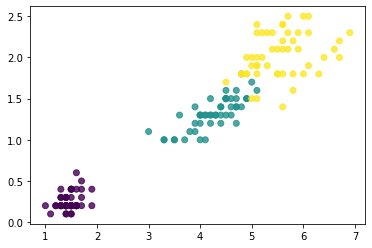

In [6]:
# Load dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
print(X.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

In [7]:
# Train a decision tree with max_depth=2
from sklearn.model_selection import train_test_split
# train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, 
                                                    test_size = 0.2, 
                                                    )

### Visualization: export_graphviz

In [8]:
#!pip install graphviz

In [9]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Train a decision tree with max_depth=2
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train)

# Visualize the decision tree
dot_data = export_graphviz(tree_clf, out_file=None, 
                           feature_names=['petal length', 'petal width'],
                           class_names=iris.target_names,
                           filled=True, rounded=True, special_characters=True)  

graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree")  # This will save the tree as a PDF file
graph.view("iris_decision_tree")    # This will open the PDF file using the default viewer


'iris_decision_tree.pdf'

In [10]:
# open image with PIL
from PIL import Image
image = Image.open("iris_tree.png")
image.show()

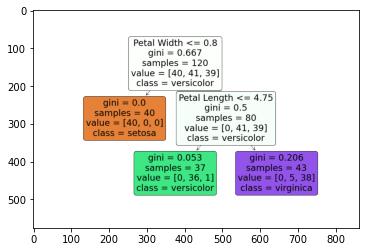

In [11]:
# open image with matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('iris_tree.png')
imgplot = plt.imshow(img)

### Visualization: plot_tree

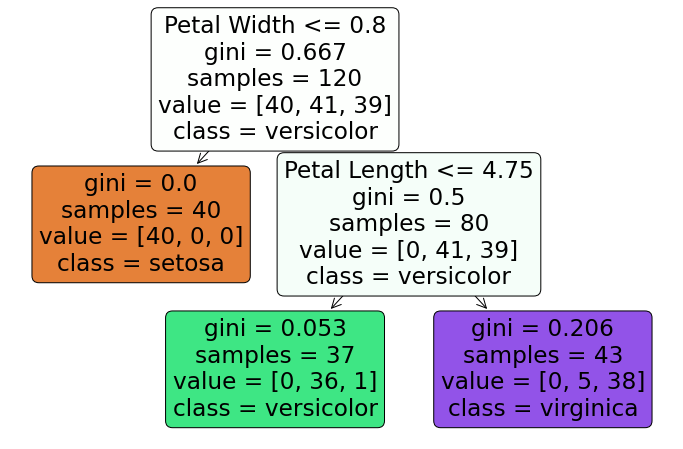

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train a decision tree with max_depth=2
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, feature_names=['Petal Length', 'Petal Width'], class_names=iris.target_names, filled=True, rounded=True)
plt.show()


Compute the predictions of a decision tree classifier on a test set and calculate all the classification metrics you know:


In [13]:
# split in train and test set


In [14]:
# fit classifier with max_depth=2


In [15]:
# Make predictions on the test set
y_pred = tree_clf.predict(X_test)

# Display the predicted labels
print("Predicted labels:", y_pred)


Predicted labels: [1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [16]:
# Print Accuracy
# Print Confusion matrix
# Print Precision
# Print Recall
# Print F1-score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Assuming you have already made predictions on the test set (y_pred) and have the true labels (y_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate and print recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate and print F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)


Accuracy: 0.9666666666666667
Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Precision: 0.9694444444444444
Recall: 0.9666666666666667
F1-score: 0.9664109121909632


## Random forests

Explain here how they work in your own words:
Random Forests are an ensemble learning method that operates by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

Here's a simplified explanation of how Random Forests work:

    Bootstrap Sampling (Bagging): The algorithm starts by creating multiple random samples (with replacement) from the original dataset. Each of these samples is used to train a different decision tree.

    Random Feature Selection: For each decision tree in the forest, a random subset of features is selected to make decisions at each node. This helps in introducing diversity among the trees.

    Building Decision Trees: A decision tree is built for each bootstrap sample using the randomly selected features. The trees are grown until a predefined depth or until further splitting is not possible based on a stopping criterion.

    Voting (Classification) or Averaging (Regression): During the prediction phase, each tree in the forest provides a classification (for classification problems) or a prediction (for regression problems). The final prediction is then determined by aggregating the individual predictions through voting or averaging.

The key advantages of Random Forests include:

    Reduced Overfitting: By constructing multiple trees and combining their predictions, Random Forests tend to be more robust and less prone to overfitting compared to individual decision trees.

    Increased Accuracy: The ensemble nature of Random Forests often results in higher accuracy compared to individual trees, especially when dealing with complex datasets.

    Implicit Feature Importance: Random Forests provide a measure of feature importance based on how much each feature contributes to the model's performance. This information can be valuable for feature selection.

    Parallelization: Training individual trees can be done in parallel, making Random Forests suitable for parallel and distributed computing.

In [17]:
# fit a Random Forest classifier 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=5, random_state=42)

# Step 5: Train the Random Forest Classifier on the training set
rf_classifier.fit(X_train, y_train)

# Step 6: Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Step 7: Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.9666666666666667

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [18]:
# make predictions on the test set
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Display the predicted labels
print("Predicted Labels:", y_pred)

Predicted Labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 1 0 2 2 2 2 2 0 0]


In [19]:
# Print Accuracy
# Print Confusion matrix
# Print Precision
# Print Recall
# Print F1-score

from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have already made predictions on the test set (y_pred) and have the true labels (y_test)

# Calculate and print precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate and print recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate and print F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)


Precision: 0.9700000000000001
Recall: 0.9666666666666667
F1-score: 0.966750208855472


## SVM


Explain here how they work in your own words:
Support Vector Machines (SVMs) are a class of supervised learning algorithms used for classification and regression tasks. SVMs work by finding the optimal hyperplane that best separates data points belonging to different classes. Here's a simplified explanation of how SVMs work:

    Linear Separation: The fundamental idea behind SVMs is to find a hyperplane that can effectively separate data points into different classes. In a two-dimensional space, this hyperplane is a line, and in higher dimensions, it becomes a hyperplane.

    Maximizing Margin: SVM aims to maximize the margin, which is the distance between the hyperplane and the nearest data points from each class. The larger the margin, the more robust and generalized the model is expected to be.

    Support Vectors: Support vectors are the data points that lie closest to the decision boundary (the hyperplane). These are the critical points that determine the position and orientation of the hyperplane.

    Kernel Trick: SVMs can handle non-linear decision boundaries by transforming the input features into a higher-dimensional space using a kernel function. This allows SVMs to find non-linear decision boundaries in the original feature space.

    C Parameter: SVMs have a regularization parameter (C) that controls the trade-off between achieving a smooth decision boundary and classifying training points correctly. A smaller C allows for a softer margin, potentially classifying more points correctly but with a narrower margin.

    SVM for Classification: For classification tasks, SVM classifies a new data point by determining on which side of the decision boundary it falls. The sign of the decision function indicates the predicted class.

    SVM for Regression: SVMs can also be used for regression tasks. In this case, the goal is to fit a hyperplane that captures the trend in the data with a specified margin of tolerance.

In [20]:
# Book example SVM: iris dataset
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
])
svm_clf.fit(X, y)

/home/shahaf.hen@Digital-Grenoble.local/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [21]:
# fit a linear SVM classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create a Linear SVM Classifier
linear_svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Step 5: Train the Linear SVM Classifier on the training set
linear_svm_classifier.fit(X_train, y_train)

# Step 6: Make predictions on the testing set
y_pred = linear_svm_classifier.predict(X_test)

# Step 7: Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [22]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid
param_grid = {'C': [0.1, 1, 10, 100]}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(kernel='linear', random_state=42), param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best parameter(s)
print("Best Parameter:", grid_search.best_params_)


Best Parameter: {'C': 1}


In [23]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(linear_svm_classifier, X, y, cv=5)

# Print the cross-validated accuracy scores
print("Cross-validated Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-validated Accuracy Scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean Accuracy: 0.9800000000000001


In [24]:
# make predictions on the test set


In [25]:
# Print Accuracy
# Print Confusion matrix
# Print Precision
# Print Recall
# Print F1-score
# Calculate and print precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate and print recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate and print F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)


Precision: 1.0
Recall: 1.0
F1-score: 1.0


## Learning curves

### Book example

In [26]:
# Book Dataset
132

132

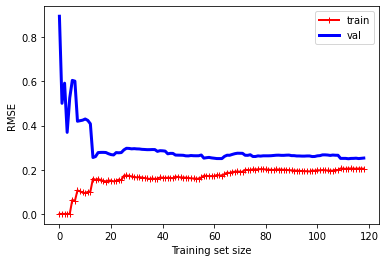

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)


new data


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
dataset = pd.read_csv('./heart.csv')

In [29]:
multicategorical_features = ['cp', 'restecg', 'slope', 'ca', 'thal']
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# Check if multicategorical features exist in the DataFrame
missing_features = set(multicategorical_features) - set(dataset.columns)
if missing_features:
    raise ValueError(f"The following multicategorical features are missing: {missing_features}")
# Create dummy variables for multicategorical features
dummy_df = pd.get_dummies(dataset, columns = multicategorical_features)

# Display the resulting DataFrame
print(dummy_df.head())

   age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  target   cp_0  ...  \
0   63    1       145   233    1      150      0      2.3       0  False  ...   
1   37    1       130   250    0      187      0      3.5       0  False  ...   
2   41    0       130   204    0      172      0      1.4       0  False  ...   
3   56    1       120   236    0      178      0      0.8       0  False  ...   
4   57    0       120   354    0      163      1      0.6       0   True  ...   

   slope_1  slope_2  ca_0   ca_1   ca_2   ca_3   ca_4  thal_1  thal_2  thal_3  
0    False    False  True  False  False  False  False    True   False   False  
1    False    False  True  False  False  False  False   False    True   False  
2    False     True  True  False  False  False  False   False    True   False  
3    False     True  True  False  False  False  False   False    True   False  
4    False     True  True  False  False  False  False   False    True   False  

[5 rows x 27 columns]


In [30]:
#Separate features and target 
y = dummy_df['target']
X =dummy_df .drop('target', axis=1)

In [31]:
#Split with a 30% test set, we stratify so that we have the same rate of positives
#in the training and test sets (as well as the same sex ratio, it will be useful at the end of the notebook)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 41, 
                                                    test_size = 0.3, 
                                                    stratify = pd.concat([dummy_df['sex'], y], axis = 1))

#Scaling continuous variables
scaler = StandardScaler()
#TOFILL 
# Fit the scaler on the training set and transform both training and test sets
X_train_scaled = X_train.copy()
X_train_scaled[continuous_features] = scaler.fit_transform(X_train[continuous_features])


X_test_scaled = X_test.copy()
X_test_scaled[continuous_features] = scaler.transform(X_test[continuous_features])

In [32]:
# Create a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier on the scaled training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)

Accuracy: 0.8461538461538461
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87        50
           1       0.86      0.78      0.82        41

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



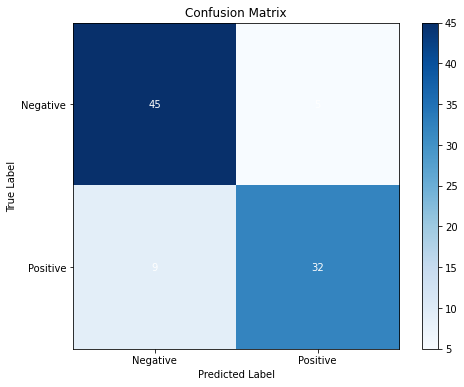

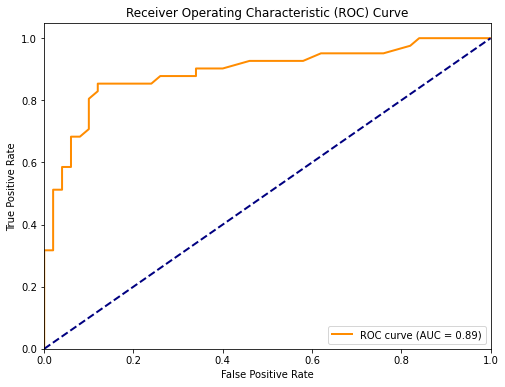

In [33]:
# Confusion Matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white')

plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Change the method so that instead of having an incremental training set size going from 1 to the size of X_train, you have a fixed set of training sizes.
For example: 

training_set_sizes = np.linspace(2, len(X_train), len(X_train), dtype='int')

or 

training_set_sizes = [1, 10, 20, 30, 40, 50, 60, 70, 80]

Accuracy (SVM): 0.8461538461538461
Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.83      0.90      0.87        50
           1       0.86      0.78      0.82        41

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



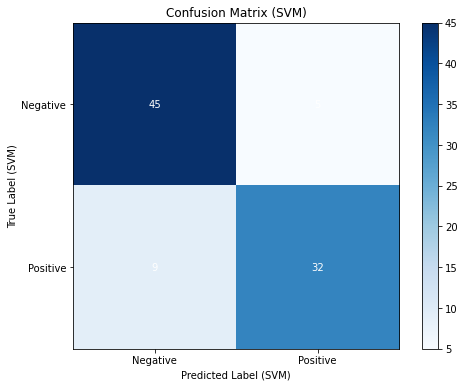

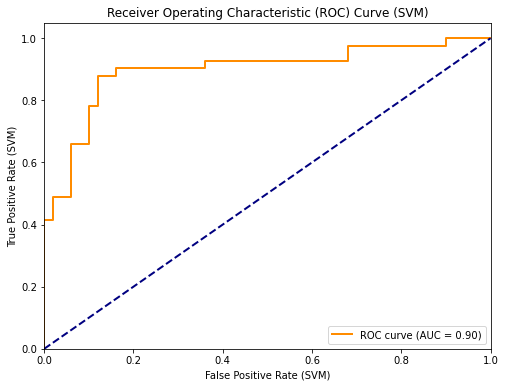

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

%matplotlib inline

# Your existing code...

# Create a Support Vector Machine (SVM) classifier
svm_classifier = SVC(random_state=42, probability=True)

# Fit the classifier on the scaled training data
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Evaluate the performance of the SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_result_svm = classification_report(y_test, y_pred_svm)

print(f"Accuracy (SVM): {accuracy_svm}")
print("Classification Report (SVM):")
print(classification_report_result_svm)

# Confusion Matrix (SVM)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot Confusion Matrix (SVM)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_svm, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix (SVM)')
plt.colorbar()
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.xlabel('Predicted Label (SVM)')
plt.ylabel('True Label (SVM)')

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix_svm[i, j]), ha='center', va='center', color='white')

plt.show()

# ROC Curve (SVM)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_classifier.predict_proba(X_test_scaled)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC Curve (SVM)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (SVM)')
plt.ylabel('True Positive Rate (SVM)')
plt.title('Receiver Operating Characteristic (ROC) Curve (SVM)')
plt.legend(loc='lower right')
plt.show()


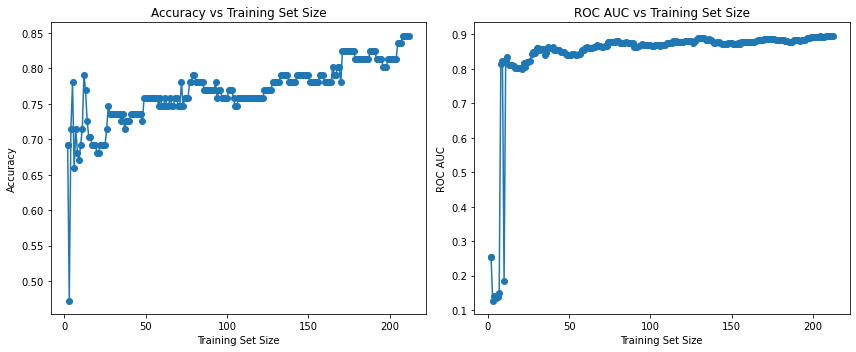

In [35]:
# Create a Support Vector Machine (SVM) classifier
svm_classifier = SVC(random_state=42, probability=True)

# Initialize arrays to store results
accuracy_scores = []
roc_aucs = []

# Iterate through different training set sizes
training_set_sizes = np.linspace(2, len(X_train), len(X_train), dtype='int')

for size in training_set_sizes:
    # Use a subset of the training data
    X_train_subset = X_train_scaled[:size]
    y_train_subset = y_train[:size]

    # Fit the classifier on the subset of the training data
    svm_classifier.fit(X_train_subset, y_train_subset)

    # Make predictions on the scaled test data
    y_pred_svm = svm_classifier.predict(X_test_scaled)

    # Evaluate the performance of the SVM classifier
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    accuracy_scores.append(accuracy_svm)

    # Compute ROC curve and AUC
    fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_classifier.predict_proba(X_test_scaled)[:, 1])
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    roc_aucs.append(roc_auc_svm)

# Plot results
plt.figure(figsize=(12, 5))

# Plot Accuracy vs Training Set Size
plt.subplot(1, 2, 1)
plt.plot(training_set_sizes, accuracy_scores, marker='o')
plt.title('Accuracy vs Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')

# Plot ROC AUC vs Training Set Size
plt.subplot(1, 2, 2)
plt.plot(training_set_sizes, roc_aucs, marker='o')
plt.title('ROC AUC vs Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('ROC AUC')

plt.tight_layout()
plt.show()

In [36]:
# Method that plots learning curves for a given estimator and training_set_sizes
def your_method_name_for_plotting_learning_curves():
   pass

In [37]:
def plot_learning_curves(estimator, X_train_scaled, y_train, X_test_scaled, y_test, training_set_sizes):
    """
    Plots learning curves for a given estimator.

    Parameters:
    - estimator: The machine learning model (e.g., SVM classifier)
    - X_train_scaled: Scaled features of the training set
    - y_train: Labels of the training set
    - X_test_scaled: Scaled features of the test set
    - y_test: Labels of the test set
    - training_set_sizes: Array of training set sizes to use for learning curves
    """
    # Initialize arrays to store results
    accuracy_scores = []
    roc_aucs = []

    for size in training_set_sizes:
        # Use a subset of the training data
        X_train_subset = X_train_scaled[:size]
        y_train_subset = y_train[:size]

        # Fit the estimator on the subset of the training data
        estimator.fit(X_train_subset, y_train_subset)

        # Make predictions on the scaled test data
        y_pred = estimator.predict(X_test_scaled)

        # Evaluate the performance of the estimator
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, estimator.decision_function(X_test_scaled))
        roc_auc = auc(fpr, tpr)
        roc_aucs.append(roc_auc)

    # Plot learning curves
    plt.figure(figsize=(12, 5))

    # Plot Accuracy vs Training Set Size
    plt.subplot(1, 2, 1)
    plt.plot(training_set_sizes, accuracy_scores, marker='o')
    plt.title('Accuracy vs Training Set Size')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')

    # Plot ROC AUC vs Training Set Size
    plt.subplot(1, 2, 2)
    plt.plot(training_set_sizes, roc_aucs, marker='o')
    plt.title('ROC AUC vs Training Set Size')
    plt.xlabel('Training Set Size')
    plt.ylabel('ROC AUC')

    plt.tight_layout()
    plt.show()


In [39]:
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

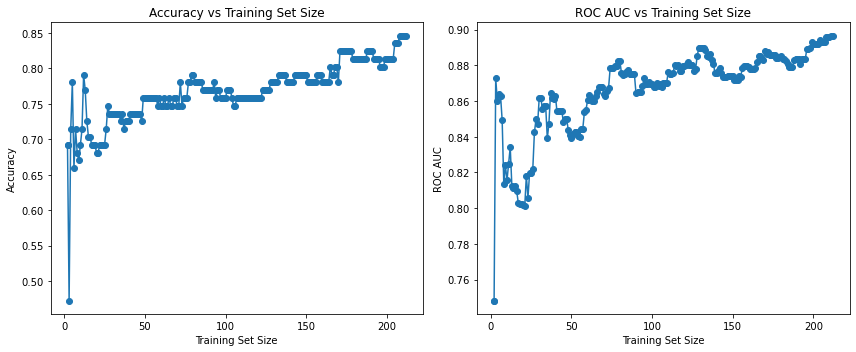

In [41]:

training_set_sizes = np.linspace(2, len(X_train_scaled), len(X_train_scaled), dtype='int')
plot_learning_curves(svm_classifier, X_train_scaled, y_train, X_test_scaled, y_test, training_set_sizes)


In [78]:
from sklearn import metrics
from matplotlib.ticker import FuncFormatter

def plot_learning_curves(estimator, X_train, y_train, X_val, y_val,
                         suptitle='', title='', xlabel='', ylabel=''):
    """
    Plots learning curves for a given estimator.
    Parameters
    ----------
    estimator : sklearn estimator
    X_train : pd.DataFrame
        training set (features)
    y_train : pd.Series
        training set (response)
    X_val : pd.DataFrame
        validation set (features)
    y_val : pd.Series
        validation set (response)
    suptitle : str
        Chart suptitle
    title: str
        Chart title
    xlabel: str
        Label for the X axis
    ylabel: str
        Label for the y axis
    Returns
    -------
    Plot of learning curves
    """
    
    # create lists to store train and validation scores
    train_score = []
    val_score = []

    # create ten incremental training set sizes
    training_set_sizes = np.arange(35, len(X_train), 10)

    # for each one of those training set sizes
    for i in training_set_sizes:
        # fit the model only using that many training examples
        estimator.fit(X_train[0:i, :], y_train[0:i])
        # calculate the training accuracy only using those training examples
        train_accuracy = metrics.accuracy_score(
                                    y_train[0:i],
                                    estimator.predict(X_train[0:i, :])
                                    )
        # calculate the validation accuracy using the whole validation set
        val_accuracy = metrics.accuracy_score(
                                    y_val,
                                    estimator.predict(X_val)
                                    )
        # store the scores in their respective lists
        train_score.append(train_accuracy)
        val_score.append(val_accuracy)
        
    # plot learning curves
    fig, ax = plt.subplots(figsize=(14, 9))
    ax.plot(training_set_sizes, train_score, c='gold')
    ax.plot(training_set_sizes, val_score, c='steelblue')

    # format the chart to make it look nice
    fig.suptitle(suptitle, fontweight='bold', fontsize='20')
    ax.set_title(title, size=20)
    ax.set_xlabel(xlabel, size=16)
    ax.set_ylabel(ylabel, size=16)
    ax.legend(['training set', 'validation set'], fontsize=16)
    ax.tick_params(axis='both', labelsize=12)
    ax.set_ylim(0, 1)

    def percentages(x, pos):
        """The two args are the value and tick position"""
        if x < 1:
            return '{:1.0f}'.format(x*100)
        return '{:1.0f}%'.format(x*100)

    def numbers(x, pos):
        """The two args are the value and tick position"""
        if x >= 1000:
            return '{:1,.0f}'.format(x)
        return '{:1.0f}'.format(x)

    y_formatter = FuncFormatter(percentages)
    ax.yaxis.set_major_formatter(y_formatter)

    x_formatter = FuncFormatter(numbers)
    ax.xaxis.set_major_formatter(x_formatter)

In [49]:
np.arange(35, len(X_train), 10)

array([ 35,  45,  55,  65,  75,  85,  95, 105, 115, 125, 135, 145, 155,
       165, 175, 185, 195, 205])

In [46]:
training_set_sizes

array([  2,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

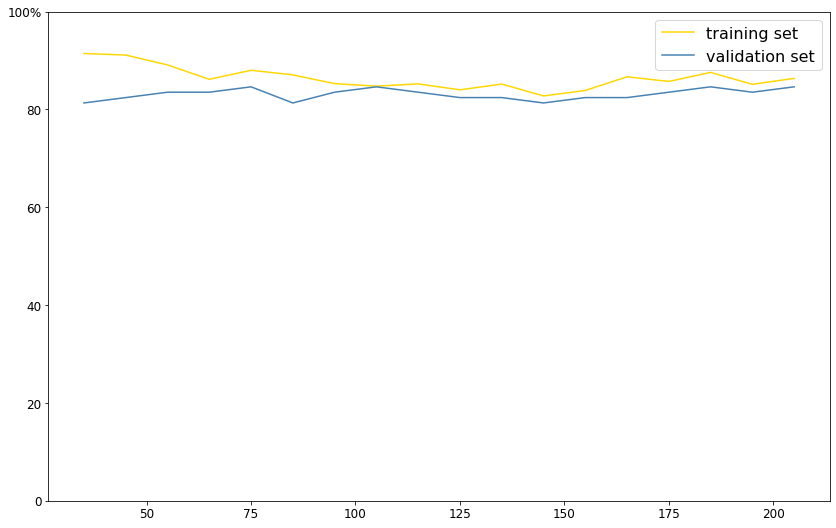

In [79]:
# Create an SVM classifier
svm_classifier = SVC(gamma=0.01)

# Plot the learning curve for the SVM classifier
plot_learning_curves(svm_classifier, X_train_scaled, y_train, X_test_scaled,y_test)

# Show the plot
plt.show()

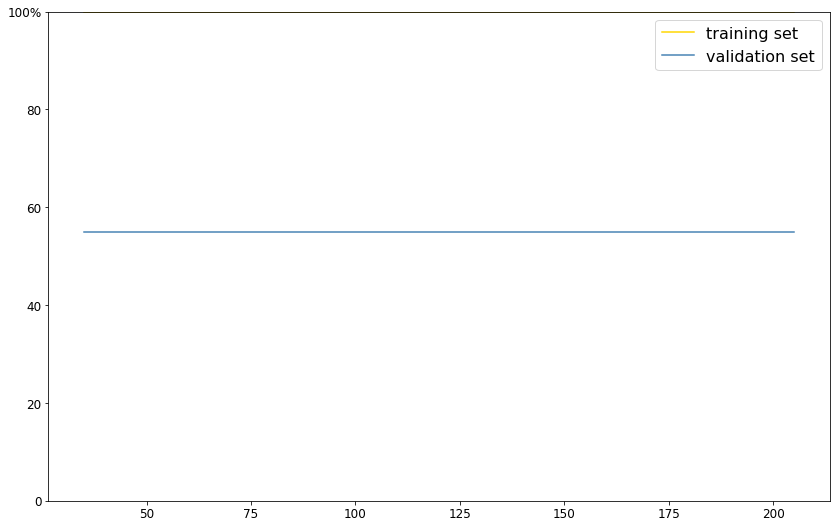

In [80]:
# Create an SVM classifier

svm_classifier = SVC(C=1, gamma=1e6)

# Plot the learning curve for the SVM classifier
plot_learning_curves(svm_classifier, X_train_scaled, y_train, X_test_scaled,y_test)

# Show the plot
plt.show()

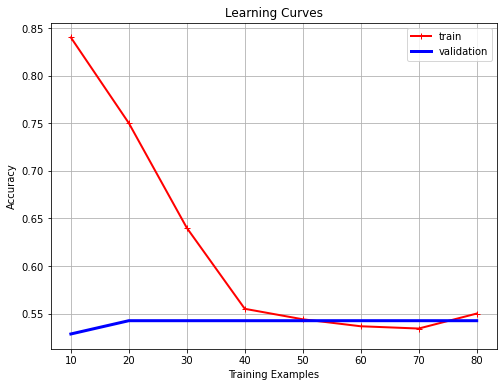

In [94]:
from sklearn.model_selection import learning_curve

# underfit model??
#High gama > Overfit
#Regularization(C)

svm_classifier = SVC(C=1e-6, gamma=1e-6)

train_sizes, train_scores, valid_scores = learning_curve(
    svm_classifier, X_train_scaled, 
   y_train, train_sizes=[1, 10, 20, 30, 40, 50, 60, 70, 80], 
    cv=5,
    scoring='accuracy')


train_accuracy = train_scores.mean(axis=1)
valid_accuracy = valid_scores.mean(axis=1)

fig, ax = plt.subplots(figsize = (8,6))
ax.plot(train_sizes, train_accuracy, "r-+", linewidth=2, label="train")
ax.plot(train_sizes, valid_accuracy, "b-", linewidth=3, label="validation")
ax.legend(loc="upper right")
ax.set_title("Learning Curves")
ax.set_xlabel("Training Examples")
ax.set_ylabel("Accuracy")
ax.legend()
ax.grid(True)
plt.show()

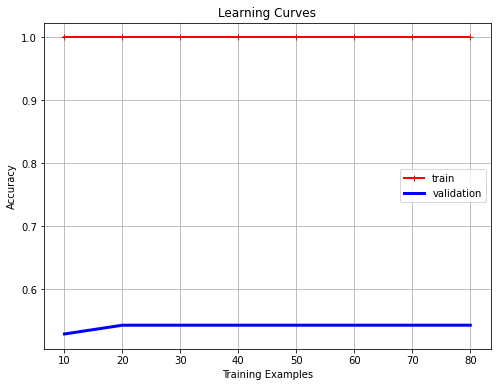

In [92]:
# Overfit model

train_sizes, train_scores, valid_scores = learning_curve(
    SVC(C=1, gamma=1e6), X_train_scaled, 
    y_train, train_sizes=[1, 10, 20, 30, 40, 50, 60, 70, 80], 
    cv=5,
    scoring='accuracy')


train_accuracy = train_scores.mean(axis=1)
valid_accuracy = valid_scores.mean(axis=1)

fig, ax = plt.subplots(figsize = (8,6))
ax.plot(train_sizes, train_accuracy, "r-+", linewidth=2, label="train")
ax.plot(train_sizes, valid_accuracy, "b-", linewidth=3, label="validation")
ax.legend(loc="upper right")
ax.set_title("Learning Curves")
ax.set_xlabel("Training Examples")
ax.set_ylabel("Accuracy")
ax.legend()
ax.grid(True)
plt.show()

## Learning curves for classifiers

Implement a ML problem on a dataset you have already seen in the course. 

Produce a plot of a model which shows signs of underfitting, and one that shows signs of overfitting.

In [35]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
# create your method to plot your learning curves using the sklearn method learning_curve()
    

SyntaxError: incomplete input (3221076519.py, line 4)

## Decision trees learning curves

In [ ]:
# import the dataset you want

In [ ]:
# do all the pre-rpocessing that is needed

In [ ]:
# Underfit model
# Train a decision tree with max_depth=2

In [ ]:
# Overfit model
# Train a decision tree with max_depth=10

## Random forests classifier learning curves

In [ ]:
# Underfit model

In [ ]:
# Overfit model

## SVM

SVM Advantages:

- SVM’s are very good when we have no idea on the data.
- Works well with even unstructured and semi structured data like text, Images and trees.
- The kernel trick is real strength of SVM. With an appropriate kernel function, we can solve any complex problem.
- Unlike in neural networks, SVM is not solved for local optima.
- It scales relatively well to high dimensional data.
- SVM models have good generalization in practice, the risk of over-fitting is less in SVM.

SVM Disadvantages:

- Choosing a “good” kernel function is not easy.
- Long training time for large datasets.
- Difficult to understand and interpret the final model, variable weights and individual impact.
- The SVM hyper parameters are Cost -C and gamma. It is not that easy to fine-tune these hyper-parameters. It is hard to visualize their impact

Accuracy of Underfit SVM: 0.5494505494505495
ROC AUC of Underfit SVM: 0.8907317073170732


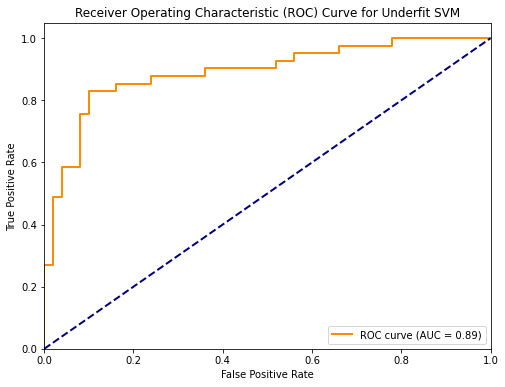

In [66]:
# Underfit model?
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a DataFrame called 'dataset'
# Replace 'target' with the actual name of your target column
X = dataset.drop('target', axis=1)
y = dataset['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an intentionally underfit SVM classifier
underfit_svm_classifier = SVC(C=1e-5, kernel='linear', random_state=42, probability=True)

# Fit the underfit SVM classifier
underfit_svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_underfit = underfit_svm_classifier.predict(X_test_scaled)

# Evaluate the performance of the underfit SVM classifier
accuracy_underfit = accuracy_score(y_test, y_pred_underfit)
print(f"Accuracy of Underfit SVM: {accuracy_underfit}")

# Compute ROC curve and AUC
fpr_underfit, tpr_underfit, _ = roc_curve(y_test, underfit_svm_classifier.decision_function(X_test_scaled))
roc_auc_underfit = auc(fpr_underfit, tpr_underfit)
print(f"ROC AUC of Underfit SVM: {roc_auc_underfit}")

# Plot ROC Curve for the underfit SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_underfit, tpr_underfit, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_underfit:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Underfit SVM')
plt.legend(loc='lower right')
plt.show()


Accuracy of Overfit SVM: 0.5824175824175825
ROC AUC of Overfit SVM: 0.8239024390243902


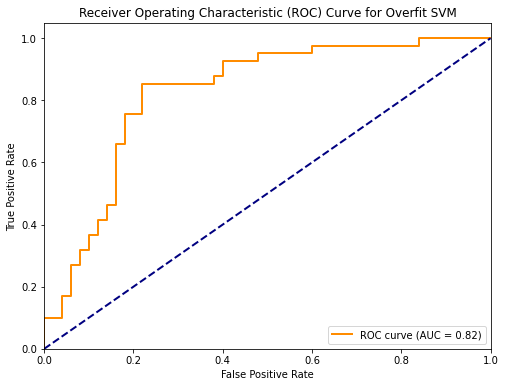

In [67]:
# Overfit model?
X = dataset.drop('target', axis=1)
y = dataset['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an intentionally overfit SVM classifier
overfit_svm_classifier = SVC(C=1e5, kernel='rbf', gamma=1, random_state=42, probability=True)

# Fit the overfit SVM classifier
overfit_svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_overfit = overfit_svm_classifier.predict(X_test_scaled)

# Evaluate the performance of the overfit SVM classifier
accuracy_overfit = accuracy_score(y_test, y_pred_overfit)
print(f"Accuracy of Overfit SVM: {accuracy_overfit}")

# Compute ROC curve and AUC
fpr_overfit, tpr_overfit, _ = roc_curve(y_test, overfit_svm_classifier.decision_function(X_test_scaled))
roc_auc_overfit = auc(fpr_overfit, tpr_overfit)
print(f"ROC AUC of Overfit SVM: {roc_auc_overfit}")

# Plot ROC Curve for the overfit SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_overfit, tpr_overfit, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_overfit:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Overfit SVM')
plt.legend(loc='lower right')
plt.show()


ROC Curve (Receiver Operating Characteristic):

    What is it?
        The ROC curve is a graphical representation of the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) for different threshold values.
        The x-axis represents the false positive rate, and the y-axis represents the true positive rate.
        Each point on the ROC curve corresponds to a different threshold for classifying positive and negative instances.

    How is it created?
        The ROC curve is created by plotting the true positive rate (sensitivity) against the false positive rate for various threshold values.
        The threshold determines the point at which a model classifies an instance as positive or negative based on its predicted probability.

    Interpretation:
        A diagonal line (the line of no-discrimination) represents a random classifier.
        The further the ROC curve is from the diagonal, the better the model's performance.
        The area under the ROC curve (AUC) is a single scalar value that summarizes the performance of the model across all possible thresholds.

AUC (Area Under the Curve):

    What is it?
        AUC is a single scalar value that quantifies the overall performance of a binary classification model across all possible threshold values.
        AUC ranges from 0 to 1, where 0.5 corresponds to a random classifier, and 1 corresponds to a perfect classifier.

    How is it computed?
        AUC is computed by calculating the area under the ROC curve. The larger the AUC, the better the model discriminates between positive and negative instances.

    Interpretation:
        AUC is interpretable as the probability that a randomly chosen positive instance will have a higher predicted probability than a randomly chosen negative instance.
        A model with an AUC of 0.8, for example, is generally considered to have good discriminative power.

In summary, the ROC curve and AUC provide a comprehensive view of a model's ability to discriminate between classes at various classification thresholds. They are particularly useful when dealing with imbalanced datasets or when different misclassification costs are associated with false positives and false negatives.

## Validation curves

Validation curves are a useful tool for improving the performance of a model by addressing issues such as overfitting or underfitting. Validation curves are related to learning curves, but instead of plotting the training and test accuracies as functions of the sample size, we vary the values of the model parameters. They are complementaru of GridSearch and make for a very nice visual tool for ypur algorithm optimization. 


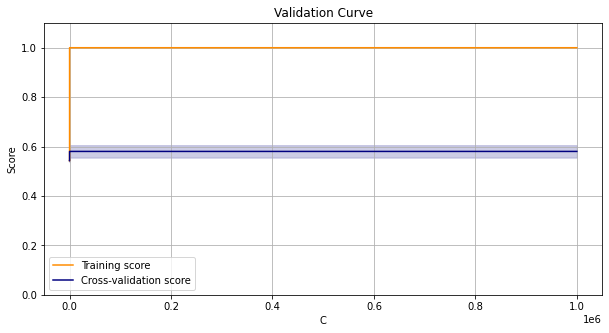

In [68]:
from sklearn.model_selection import validation_curve
def plot_validation_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, param_range=None, paran_name=None):

    # create your method to plot your learning curves using the sklearn method validation_curve()
    from sklearn.model_selection import validation_curve

def plot_validation_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, param_range=None, param_name=None):
    """
    Plot validation curve for a given estimator.

    Parameters:
    - estimator: The machine learning model
    - title: Title of the plot
    - X: Input features
    - y: Target variable
    - axes: Axes to plot the figures
    - ylim: Tuple defining y-axis limits
    - cv: Cross-validation strategy
    - n_jobs: Number of jobs to run in parallel
    - param_range: Range of hyperparameter values to plot
    - param_name: Name of the hyperparameter

    Returns:
    - axes: Axes containing the plot
    """

    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring="accuracy", n_jobs=n_jobs)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)

    axes.set_xlabel(param_name)
    axes.set_ylabel("Score")

    axes.grid()
    axes.plot(param_range, train_scores_mean, label="Training score", color="darkorange")
    axes.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange")
    axes.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy")
    axes.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy")
    axes.legend(loc="best")

    return axes

# Example Usage:
# Assuming you have an SVM classifier (svm_classifier) and scaled training/test sets
param_range = np.logspace(-6, 6, 13)
param_name = 'C'

# Create an intentionally overfit SVM classifier for illustration purposes
overfit_svm_classifier = SVC(kernel='rbf', gamma=1, random_state=42)

# Plot the validation curve for the 'C' parameter
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
plot_validation_curve(overfit_svm_classifier, "Validation Curve", X_train_scaled, y_train, axes=axes,
                      ylim=(0.0, 1.1), cv=5, n_jobs=-1, param_range=param_range, param_name=param_name)

plt.show()

Plot the validation curves for a chosen algorithm and vary 1 or 2 parameters of your choice.

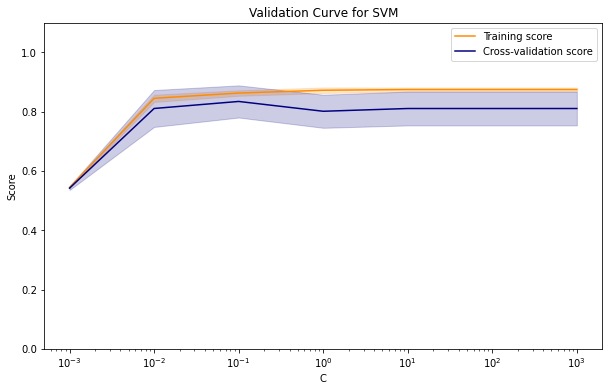

In [69]:
def plot_validation_curve(estimator, title, X, y, param_name, param_range, cv=None, scoring=None, ylim=None):
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange")
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange")
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="navy")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy")
    plt.legend(loc="best")
    plt.show()

X = dataset.drop('target', axis=1)
y = dataset['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Vary the 'C' parameter in SVM
param_range = np.logspace(-3, 3, 7)
param_name = 'C'

# Create SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Plot the validation curve
plot_validation_curve(svm_classifier, "Validation Curve for SVM", X_train_scaled, y_train,
                      param_name=param_name, param_range=param_range, cv=5, scoring='accuracy', ylim=(0.0, 1.1))


Components of the Validation Curve:

    Training Score Curve:
        The orange line represents the training score (performance metric, e.g., accuracy) as the hyperparameter varies.
        It shows how well the model performs on the training set.

    Validation Score Curve:
        The blue line represents the cross-validation score as the hyperparameter varies.
        It indicates how well the model generalizes to unseen data.

    Shaded Areas:
        The shaded areas around the curves represent the variability (standard deviation) of the scores at each hyperparameter value.

Interpretation:

    Underfitting (High Bias):
        If both the training and validation scores are low and close together, it suggests that the model is too simple (high bias).
        Increasing the hyperparameter might improve both training and validation scores.

    Optimal Model:
        The point where the validation score is highest indicates the hyperparameter value that results in the best model performance on unseen data.
        In the graph, this is the peak of the blue curve.

    Overfitting (High Variance):
        If the training score is high, but the validation score is significantly lower, it suggests overfitting (high variance).
        Overfitting occurs when the model fits the training data too closely but fails to generalize well.

Specifics for the Example:

    Parameter 'C' in SVM:
        In this example, the 'C' parameter in the linear SVM is varied.
        'C' controls the trade-off between achieving a low training error and a low testing error. Higher 'C' values lead to a more complex model.

    Interpretation:
        If both training and validation scores are low, increasing 'C' may be beneficial, allowing the model to capture more complex patterns.
        If the training score is high, but the validation score is significantly lower, it suggests overfitting. Reducing 'C' might help mitigate overfitting.

    Optimal 'C' Value:
        The optimal 'C' value is where the validation score is maximized without a significant drop in training score.
        In the graph, look for the point where the blue curve reaches its peak.

Action Steps:

    Underfitting:
        If both training and validation scores are low, consider increasing the hyperparameter values (in this case, 'C').

    Optimal Model:
        Look for the hyperparameter value where the validation score is highest.

    Overfitting:
        If there is a large gap between training and validation scores, consider reducing the hyperparameter values.

In summary, the validation curve helps you find the right balance of model complexity (controlled by hyperparameters) that results in good generalization performance on new, unseen data. The goal is to identify the hyperparameter value that maximizes the validation score without overfitting the training data.

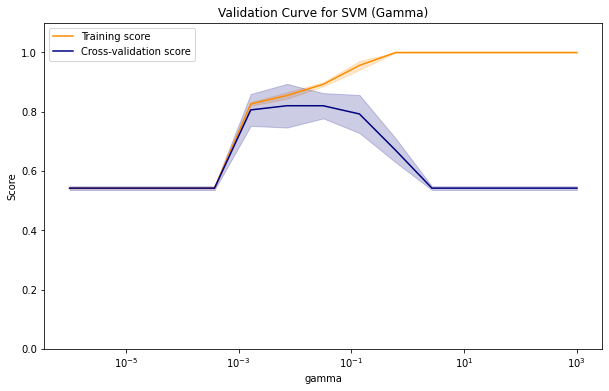

In [70]:

X = dataset.drop('target', axis=1)
y = dataset['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Vary the 'gamma' parameter in SVM
param_range_gamma = np.logspace(-6, 3, 15)
param_name_gamma = 'gamma'

# Create SVM classifier
svm_classifier_gamma = SVC(kernel='rbf', random_state=42)

# Plot the validation curve for 'gamma'
plot_validation_curve(svm_classifier_gamma, "Validation Curve for SVM (Gamma)", X_train_scaled, y_train,
                      param_name=param_name_gamma, param_range=param_range_gamma, cv=5, scoring='accuracy', ylim=(0.0, 1.1))


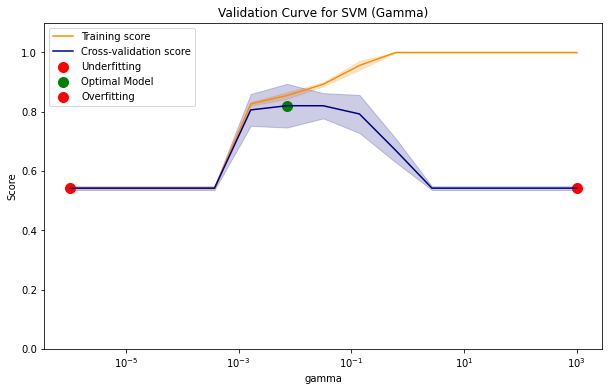

In [71]:
def plot_validation_curve_with_markers(estimator, title, X, y, param_name, param_range, cv=None, scoring=None, ylim=None):
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange")
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange")
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="navy")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy")

    # Add markers for potential underfitting and overfitting
    plt.scatter(param_range[0], test_scores_mean[0], color='red', marker='o', s=100, label='Underfitting')
    plt.scatter(param_range[np.argmax(test_scores_mean)], np.max(test_scores_mean),
                color='green', marker='o', s=100, label='Optimal Model')
    plt.scatter(param_range[-1], test_scores_mean[-1], color='red', marker='o', s=100, label='Overfitting')

    plt.legend(loc="best")
    plt.show()

# Assuming you have loaded your dataset into a DataFrame called 'dataset'
# Replace 'target' with the actual name of your target column
X = dataset.drop('target', axis=1)
y = dataset['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Vary the 'gamma' parameter in SVM
param_range_gamma = np.logspace(-6, 3, 15)
param_name_gamma = 'gamma'

# Create SVM classifier
svm_classifier_gamma = SVC(kernel='rbf', random_state=42)

# Plot the validation curve for 'gamma' with markers
plot_validation_curve_with_markers(svm_classifier_gamma, "Validation Curve for SVM (Gamma)", X_train_scaled, y_train,
                                   param_name=param_name_gamma, param_range=param_range_gamma, cv=5, scoring='accuracy', ylim=(0.0, 1.1))


Do a GridSearch and see if the most optimal parameter is coherent with what you see on your validation curves